# Boston Area Assessment

## Import Datasets

In [39]:
import pandas as pd
import numpy as np

In [40]:
price_dataset1 = pd.read_csv('../datasets/price_datasets/fy2015.csv')
price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
price_dataset5 = pd.read_csv('../datasets/price_datasets/fy2019.csv')
price_dataset6 = pd.read_csv('../datasets/price_datasets/fy2020.csv')
price_dataset7 = pd.read_csv('../datasets/price_datasets/fy2021.csv')
price_dataset8 = pd.read_csv('../datasets/price_datasets/fy2022.csv')
price_dataset9 = pd.read_csv('../datasets/price_datasets/fy2023.csv')
price_dataset9 = pd.read_csv('../datasets/price_datasets/fy2024.csv')
price_dataset9 = pd.read_csv('../datasets/price_datasets/fy2025.csv')

/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/2376971093.py:2: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/2376971093.py:3: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/2376971093.py:4: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/2376971093.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset5 = pd.read_csv('../da

## Preprocessing 1

In [41]:
for i in range(1,10):
    print(f"Dataset {i} shape: ", eval(f"price_dataset{i}.shape"))

print(f"Total rows in all datasets: {sum([eval(f'price_dataset{i}.shape[0]') for i in range(1,10)])}")

Dataset 1 shape:  (168115, 56)
Dataset 2 shape:  (169199, 77)
Dataset 3 shape:  (170910, 75)
Dataset 4 shape:  (172841, 75)
Dataset 5 shape:  (174668, 75)
Dataset 6 shape:  (175052, 75)
Dataset 7 shape:  (177091, 63)
Dataset 8 shape:  (178598, 64)
Dataset 9 shape:  (183445, 66)
Total rows in all datasets: 1569919


In [42]:
combined_price_data = pd.concat([eval(f"price_dataset{i}") for i in range(1,10)], ignore_index=True)
print("Combined dataset shape: ", combined_price_data.shape)

Combined dataset shape:  (1569919, 139)


In [43]:
combined_price_data.head()

,PID,CM_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,full_address,PTYPE,LU,...,ST_NUM2,ZIP_CODE,MAIL_STREET_ADDRESS,MAIL_ZIP_CODE,SFYI_VALUE,GROSS_TAX,EXT_FNISHED,KITCHENS,HEAT_SYSTEM,FIREPLACES
0,1302299000_,NaN,199,SAVIN HILL,AV,NaN,02125_,199 SAVIN HILL AV,105.0,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1302298000_,NaN,195,SAVIN HILL,AV,NaN,02125_,195 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1302297000_,NaN,193,SAVIN HILL,AV,NaN,02125_,193 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1302296000_,NaN,6 8,SOUTHVIEW,ST,NaN,02125_,6 8 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1302295000_,NaN,10 12,SOUTHVIEW,ST,NaN,02125_,10 12 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
combined_price_data["KITCHENS"].value_counts()

KITCHENS
1.0    103426
0.0     35984
2.0     17583
3.0     13836
4.0       143
5.0         1
Name: count, dtype: int64

In [45]:
combined_price_data["HEAT_SYSTEM"].value_counts()

HEAT_SYSTEM
I - Indiv. Cntrl      45341
Y - Self Contained    19247
C - Common             8041
N - None                967
1                        58
Name: count, dtype: int64

In [46]:
# Since "TOTAL_VALUE" is a key column for price prediction, we keep the data points that have it
print(f"Null Values: {combined_price_data['TOTAL_VALUE'].isna().sum()}")

Null Values: 1041187


In [47]:
clean_combined_price_data = combined_price_data.dropna(subset=["TOTAL_VALUE"])
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

Cleaned combined dataset shape:  (528732, 139)


In [48]:
print("These are all the columns: \n", clean_combined_price_data.columns)


These are all the columns: 
 Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
       'ZIPCODE', 'full_address', 'PTYPE', 'LU',
       ...
       'ST_NUM2', 'ZIP_CODE', 'MAIL_STREET_ADDRESS', 'MAIL_ZIP_CODE',
       'SFYI_VALUE', ' GROSS_TAX ', 'EXT_FNISHED', 'KITCHENS', 'HEAT_SYSTEM',
       'FIREPLACES'],
      dtype='object', length=139)


In [49]:
clean_combined_price_data.columns


Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
       'ZIPCODE', 'full_address', 'PTYPE', 'LU',
       ...
       'ST_NUM2', 'ZIP_CODE', 'MAIL_STREET_ADDRESS', 'MAIL_ZIP_CODE',
       'SFYI_VALUE', ' GROSS_TAX ', 'EXT_FNISHED', 'KITCHENS', 'HEAT_SYSTEM',
       'FIREPLACES'],
      dtype='object', length=139)

# === Visualize Start Here ===

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [51]:
for col in ["KITCHENS", "FIREPLACES", "SFYI_VALUE", " GROSS_TAX "]:
    if col in clean_combined_price_data.columns:
        print(f"\n=== {col} ===")
        print("Dtype:", clean_combined_price_data[col].dtype)
        print("Unique non-null values:", clean_combined_price_data[col].nunique())
        print("Sample values:", clean_combined_price_data[col].dropna().unique()[:10])



=== KITCHENS ===
Dtype: float64
Unique non-null values: 6
Sample values: [3. 1. 2. 4. 0. 5.]

=== FIREPLACES ===
Dtype: float64
Unique non-null values: 13
Sample values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

=== SFYI_VALUE ===
Dtype: object
Unique non-null values: 2987
Sample values: ['0' '11,600' '160,500' '6,600' '12,900' '19,700' '3,900' '47,900'
 '14,400' '2,800']

===  GROSS_TAX  ===
Dtype: object
Unique non-null values: 40488
Sample values: [' $9,252.42 ' ' $9,761.94 ' ' $9,448.12 ' ' $8,964.08 ' ' $8,936.29 '
 ' $15,609.84 ' ' $15,142.01 ' ' $14,017.59 ' ' $10,863.20 '
 ' $-\u2007\u2007 ']


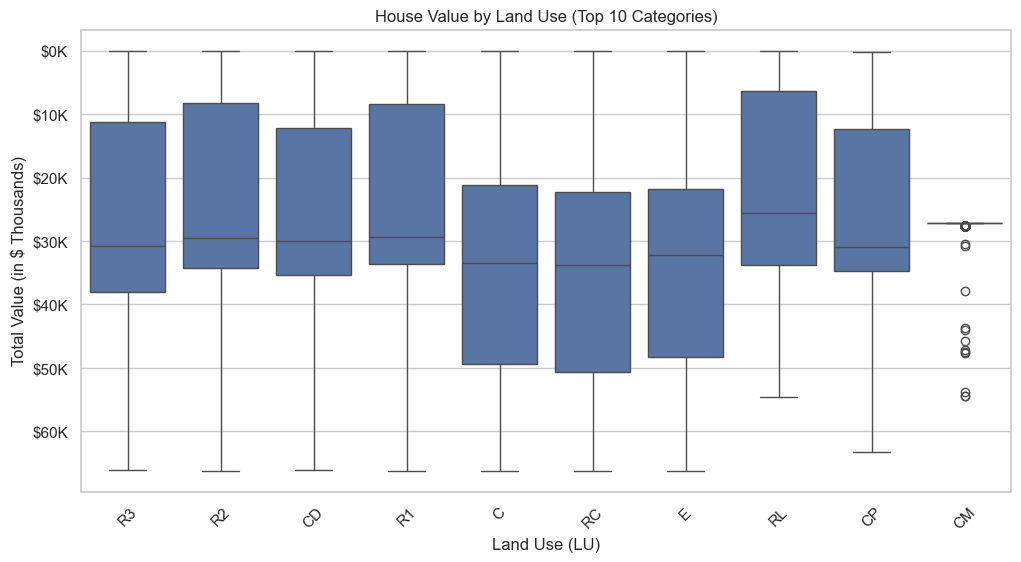

In [52]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
top_lu = clean_combined_price_data["LU"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["LU"].isin(top_lu)]

sns.boxplot(x="LU", y="TOTAL_VALUE", data=subset)
plt.title("House Value by Land Use (Top 10 Categories)")
plt.xlabel("Land Use (LU)")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8)) 

plt.show()


/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/627973046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_price_data["ZIPCODE"] = clean_combined_price_data["ZIPCODE"].astype(str)


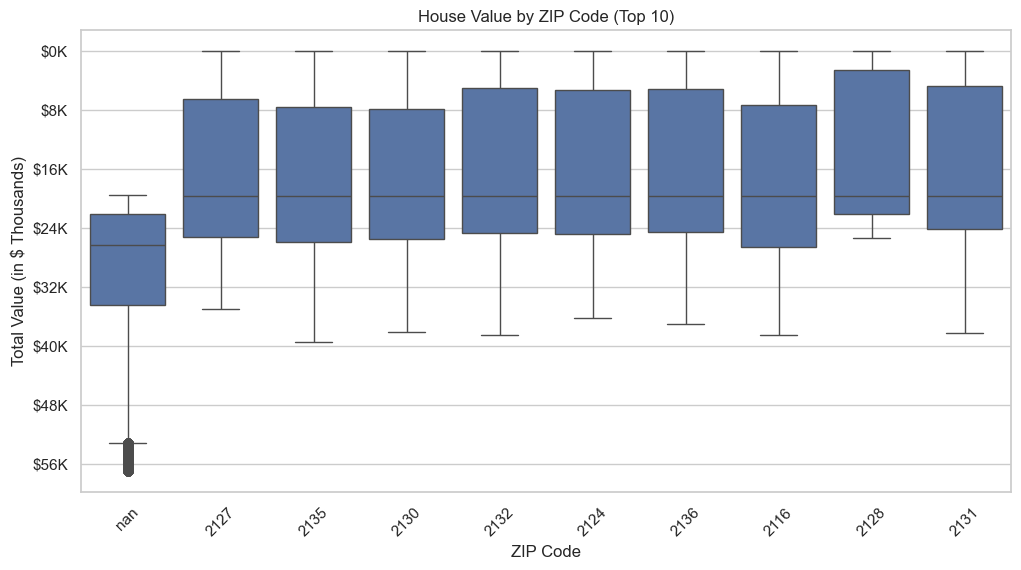

In [53]:
plt.figure(figsize=(12,6))

clean_combined_price_data["ZIPCODE"] = clean_combined_price_data["ZIPCODE"].astype(str)
top_zip = clean_combined_price_data["ZIPCODE"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zip)]

sns.boxplot(x="ZIPCODE", y="TOTAL_VALUE", data=subset, order=top_zip)
plt.title("House Value by ZIP Code (Top 10)")
plt.xlabel("ZIP Code")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8))

plt.show()

Top numeric features for histograms: ['GROSS_AREA', 'LIVING_AREA', 'ST_NUM2', 'COM_UNITS', 'LUC', 'YR_REMODEL']


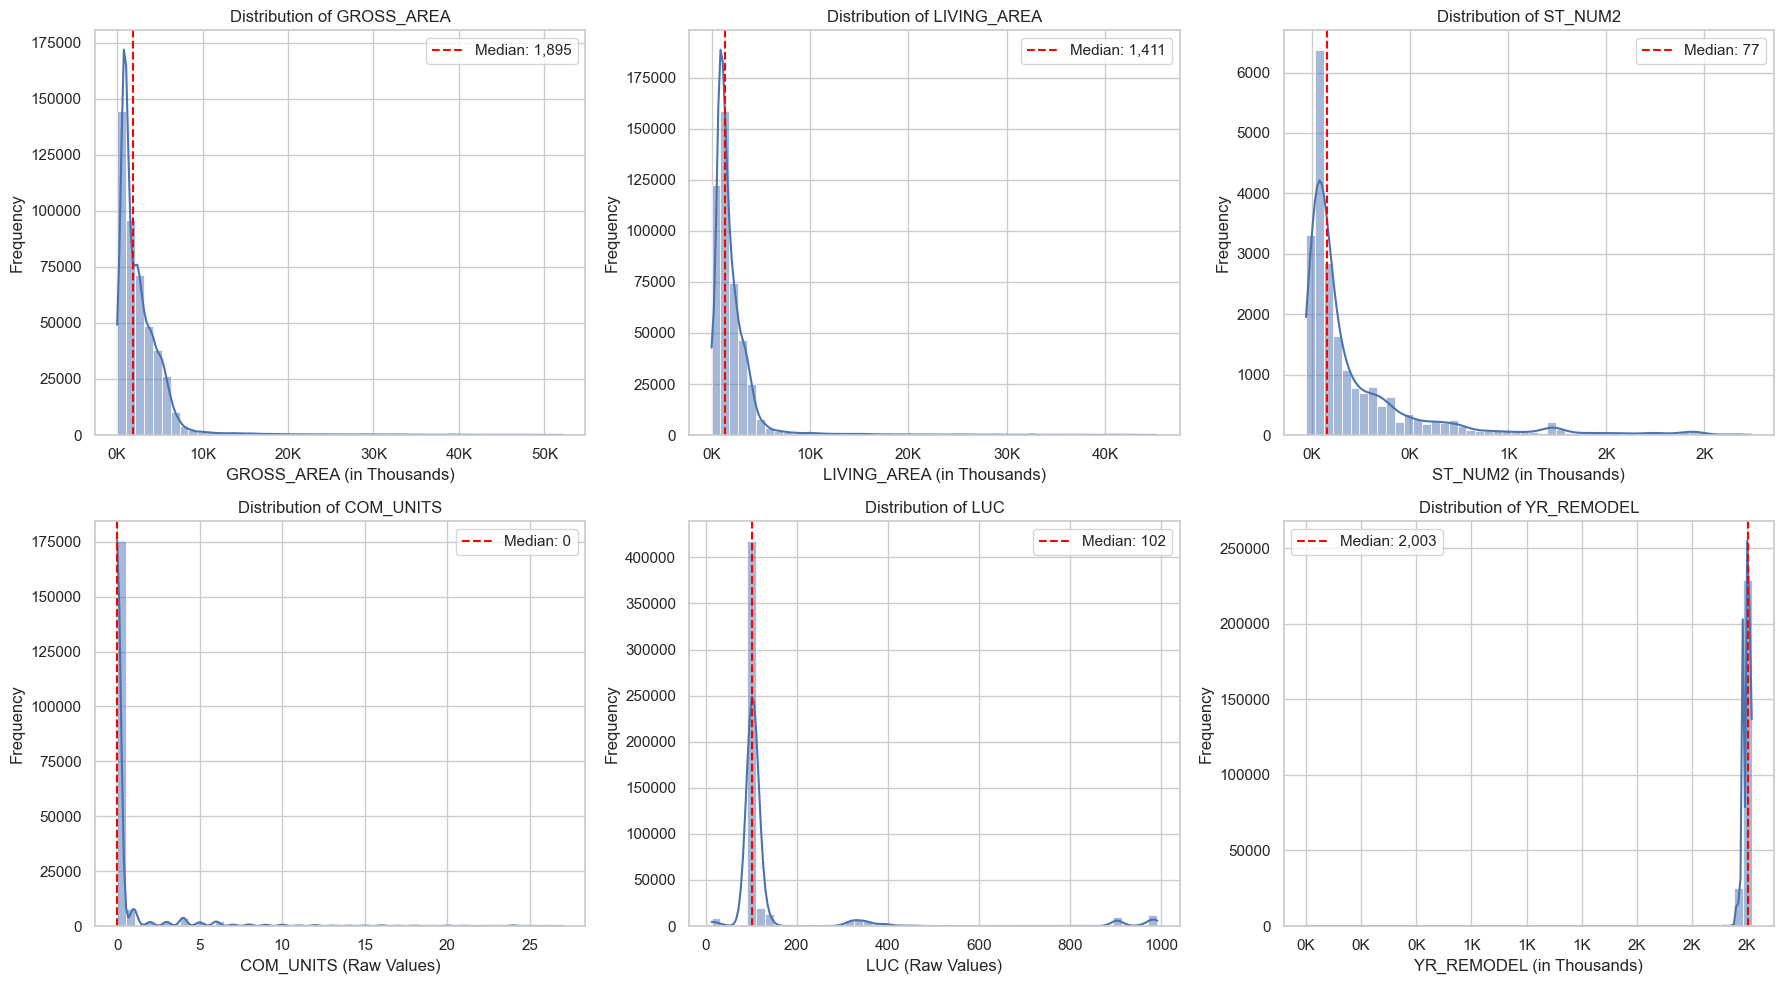

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

numeric_cols = clean_combined_price_data.select_dtypes(include=[np.number]).columns.tolist()
variances = clean_combined_price_data[numeric_cols].var().sort_values(ascending=False)
top_features = [c for c in variances.index if c != "TOTAL_VALUE"][:6]

print("Top numeric features for histograms:", top_features)
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for i, col in enumerate(top_features):
    series = clean_combined_price_data[col].dropna()
    cutoff = np.percentile(series, 99)
    series = series[series < cutoff]
    median_val = series.median()
    sns.histplot(series, bins=50, kde=True, ax=axes[i])
    axes[i].axvline(median_val, color="red", linestyle="--", label=f"Median: {median_val:,.0f}")
    axes[i].set_title(f"Distribution of {col}")
    if series.max() > 1e6:   
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        axes[i].set_xlabel(f"{col} (in Millions)")
    elif series.max() > 1e3:
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
        axes[i].set_xlabel(f"{col} (in Thousands)")
    else:
        axes[i].set_xlabel(f"{col} (Raw Values)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
    
plt.tight_layout()
plt.show()


/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/3638749320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_price_data["TOTAL_VALUE"] = pd.to_numeric(
/var/folders/7d/xbbm7mvd2bbf7wszn785fh1r0000gn/T/ipykernel_73370/3638749320.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


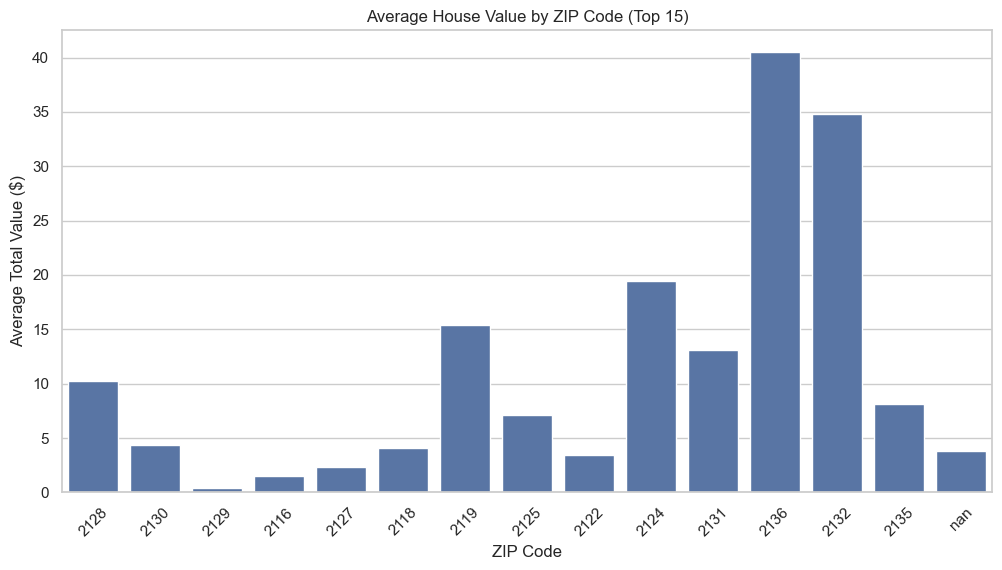

In [73]:
import matplotlib.ticker as mtick

if "ZIPCODE" in clean_combined_price_data.columns:
    clean_combined_price_data["TOTAL_VALUE"] = pd.to_numeric(
        clean_combined_price_data["TOTAL_VALUE"], errors="coerce"
    )
    top_zips = clean_combined_price_data["ZIPCODE"].value_counts().head(15).index
    subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zips)]

    plt.figure(figsize=(12,6))
    sns.barplot(
        x="ZIPCODE", 
        y="TOTAL_VALUE", 
        data=subset, 
        estimator="mean", 
        ci=None
    )

    plt.title("Average House Value by ZIP Code (Top 15)")
    plt.xlabel("ZIP Code")
    ax = plt.gca()
    max_val = subset["TOTAL_VALUE"].max()

    if max_val > 1e6:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
        plt.ylabel("Average Total Value (in $ Millions)")
    elif max_val > 1e3:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
        plt.ylabel("Average Total Value (in $ Thousands)")
    else:
        plt.ylabel("Average Total Value ($)")

    plt.xticks(rotation=45)
    plt.show()
else:
    print("ZIPCODE column not found in dataset.")


# === Visualize Ends Here ===

In [37]:
clean_combined_price_data = combined_price_data.dropna(subset=["TOTAL_VALUE"])
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

Cleaned combined dataset shape:  (528732, 139)


In [38]:
print("These are all the columns: \n", clean_combined_price_data.columns)

These are all the columns: 
 Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
       'ZIPCODE', 'full_address', 'PTYPE', 'LU',
       ...
       'ST_NUM2', 'ZIP_CODE', 'MAIL_STREET_ADDRESS', 'MAIL_ZIP_CODE',
       'SFYI_VALUE', ' GROSS_TAX ', 'EXT_FNISHED', 'KITCHENS', 'HEAT_SYSTEM',
       'FIREPLACES'],
      dtype='object', length=139)


In [39]:
clean_combined_price_data["FULL_BTH"].value_counts()

FULL_BTH
1.0     193796
2.0     131971
0.0      83808
3.0      58824
4.0       7252
6.0       1571
5.0       1381
7.0        173
8.0         91
9.0         32
13.0         4
12.0         4
17.0         3
10.0         3
15.0         2
11.0         1
14.0         1
21.0         1
Name: count, dtype: int64

In [40]:
clean_combined_price_data["BED_RMS"].value_counts()

BED_RMS
2.0     111185
3.0      81413
1.0      65697
0.0      53553
4.0      45817
6.0      30369
5.0      24503
9.0       9885
8.0       6929
7.0       6613
11.0      1177
10.0      1115
12.0       979
14.0       148
13.0        92
15.0        59
16.0         7
17.0         7
18.0         4
21.0         1
Name: count, dtype: int64

In [41]:
clean_combined_price_data = clean_combined_price_data[["ZIPCODE", "TOTAL_VALUE", "BED_RMS", "FULL_BTH"]]
clean_combined_price_data.head()

,ZIPCODE,TOTAL_VALUE,BED_RMS,FULL_BTH
1030785,2128,"$719,400.00",6.0,3.0
1030786,2128,"$744,800.00",3.0,3.0
1030787,2128,"$730,500.00",5.0,3.0
1030788,2128,"$667,900.00",5.0,3.0
1030789,2128,"$714,200.00",6.0,3.0


In [42]:
clean_combined_price_data.shape

(528732, 4)

In [44]:
# Since there are certain classes with very few data points, we will remove those classes to bring balance to the dataset
# Compute counts per BED_RMS and filter rows whose BED_RMS has at least 30,000 occurrences
bed_counts = clean_combined_price_data["BED_RMS"].value_counts()
clean_combined_price_data = clean_combined_price_data[clean_combined_price_data["BED_RMS"].map(bed_counts) >= 30000]
clean_combined_price_data.shape

(388034, 4)

In [45]:
clean_combined_price_data["FULL_BTH"].value_counts()

FULL_BTH
1.0     187999
2.0     115833
0.0      47503
3.0      32249
4.0       3505
5.0        492
6.0        376
7.0         30
8.0         15
9.0          6
13.0         2
Name: count, dtype: int64

In [46]:
# Since there is a big gap of occurrences between certain classes of FULL_BTH, we will remove those classes with very few data points
# Compute counts per FULL_BTH and filter rows whose FULL_BTH has at least 30,000 occurrences
bath_counts = clean_combined_price_data["FULL_BTH"].value_counts()
clean_combined_price_data = clean_combined_price_data[clean_combined_price_data["FULL_BTH"].map(bath_counts) >= 30000]
clean_combined_price_data.shape

(383584, 4)